In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
columns_to_timestamp = ['Ukončeno FLYER', 'Datum přidělení', 'Domluvená montáž', 'Datum zápisu','Aktivován', 'Vráceno Callcentru', 'Zrušeno', ]
columns_to_drop = [ 'Plus freeSAT', 'Zdroj Plus freeSAT', 'HBO MaxPak', 'Zdroj HBO MaxPak', 'freeSAT HD', 'Zdroj freeSAT HD', 'Odebraná karta', 'Odebraný přijímač', 'Firma', 'Operator',   'Volat v',  'Zaplaceno obchodníkovy', 'Zaplaceno všem', 'Fakturace', 'Proplaceno', 'Číslo faktury',  'Služba', 'Vybrat peníze', 'Cena instalace', 'Občanský průkaz', 'IČO', 'Telefon 1', 'Telefon 2', 'Mobil', 'Email', 'Ulice', 'Číslo popisné', 'Číslo orientační', 'PSČ']

def make_timestamp(df):
    for i in columns_to_timestamp:
        df[i] =  pd.to_datetime(df[i], dayfirst=True)
    
    
# Merchants functions
def Get_Rating(Merchant) :
    dfA_cancled = df_all.loc[(df_all['Stav'] == 'Zrušen' ) & (df_all['Zdroj objednávky'] == Merchant)  ].count()['Kód kampaně']
    dfA_flyer = df_all.loc[(df_all['Stav'] == 'Ukončeno FLYER'  ) & (df_all['Zdroj objednávky'] == Merchant )  ].count()['Kód kampaně']
    Rating = dfA_flyer - dfA_cancled
    return Rating

def Get_Overallsales(Merchant) :
    dfA_cancled = df_all.loc[(df_all['Stav'] == 'Zrušen' ) & (df_all['Zdroj objednávky'] == Merchant)  ].count()['Kód kampaně']
    dfA_flyer = df_all.loc[(df_all['Stav'] == 'Ukončeno FLYER'  ) & (df_all['Zdroj objednávky'] == Merchant )  ].count()['Kód kampaně']
    Overallsales = dfA_flyer + dfA_cancled
    return Overallsales

def Get_Probability(Merchant) :
    dfA_cancled = df_all.loc[(df_all['Stav'] == 'Zrušen' ) & (df_all['Zdroj objednávky'] == Merchant)  ].count()['Kód kampaně']
    dfA_flyer = df_all.loc[(df_all['Stav'] == 'Ukončeno FLYER'  ) & (df_all['Zdroj objednávky'] == Merchant )  ].count()['Kód kampaně']
    if dfA_flyer == 0:
        Probability = 0
    else:    
        Probability = dfA_flyer/(dfA_flyer + dfA_cancled)
    return Probability

#Customers functions
def Age_from_birth_nuber(RC_test):
    if RC_test.find('/') != -1:
        year = RC_test[0:2]
        month = RC_test[2:4]
        day = RC_test[4:6]
        year_of_birth = f'{day}.{month}.19{year}'
    
    elif RC_test.find('.') != -1 and len(RC_test) < 10:
        year_of_birth = RC_test
    else:
        year_of_birth = 'NaN'
    return year_of_birth

def Get_gender(surname):
    if surname.find('ova') != -1 or surname.find('ová') != -1 or surname.find('OVÁ') != -1 or surname.find('OVA') != -1 or surname.find('otná') != -1 or surname.find('OTNÁ') != -1 :
        gender = True 
    elif surname == 'nan':
        gender = 'nan'
    else:
        gender = False
    return gender            

In [2]:
#loading DF
df_all = pd.read_csv('intersat_final_df.csv')
make_timestamp(df_all)
# df_all.columns
df_all.shape

C:\Users\fandl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(27106, 61)

In [3]:
df_all = df_all.set_index('ID')
df_all = df_all.drop(columns=columns_to_drop)
df_all = df_all.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1'])
df_all = df_all.sort_values(by=['ID'],ascending=False)

#clearing DF of tests clients
df_test1 = df_all.loc[(df_all['Jméno'] == 'TEST' )]
print(df_test1['Stav'].count())
df_all = df_all.drop(df_test1.index)

df_test2 = df_all.loc[(df_all['Příjmení'] == 'TEST' )]
print(df_test2['Stav'].count())
df_all = df_all.drop(df_test2.index)

#cleaning of duplicete rows by CRM
df_duplicate = df_all.loc[(df_all['Duvod zrušení'] == 'Duplicitní záznam' )]
df_all = df_all.drop(df_duplicate.index)
print(df_duplicate['Stav'].count())

#cleaning of empty merchant
df_all.loc[df_all['Zdroj objednávky'].isna()  , "Zdroj objednávky"] = "Unknow"
df_gg = df_all.loc[(df_all['Zdroj objednávky'] == 'Unknow')]
print(df_gg['Zdroj objednávky'].count())



3
2
556
27


In [39]:
# df_dupe = df_all.loc[(df_all['Zdroj objednávky'].isna())]
# df_gg = df_all

# df_gg.loc[df_gg['Zdroj objednávky'].isna()  , "Zdroj objednávky"] = "Unknow"
df_gg = df_all.loc[(df_all['Zdroj objednávky'] == 'Unknow')]

df_gg['Zdroj objednávky'].count()

27

In [139]:
gg = df_all['Titul'].isna().count() -  df_all['Titul'].count()
gg

26377

In [4]:
#Making DF of merchants
print('Wait for blessing of Omnissiah')
List_of_merchants = df_all['Zdroj objednávky'].unique()
Merchant_ratings = pd.DataFrame(data=List_of_merchants, columns = ['Merchant'])
Merchant_ratings['Merchant_Rating'] = Merchant_ratings['Merchant'].apply(Get_Rating)
Merchant_ratings['Merchant_Overall'] = Merchant_ratings['Merchant'].apply(Get_Overallsales)
Merchant_ratings['Merchant_Probability'] = Merchant_ratings['Merchant'].apply(Get_Probability)
Merchant_ratings['Merchant_Is_Relevant'] = Merchant_ratings['Merchant_Overall']>50
Merchant_ratings = Merchant_ratings.rename(columns={"Merchant": "Zdroj objednávky"})
print('Praise the Machine God !!!!')

Wait for blessing of Omnissiah
Praise the Machine God !!!!


In [108]:
Merchant_ratings = Merchant_ratings.drop([15, 25])
# df_gg2 = Merchant_ratings.loc[Merchant_ratings['Merchant_Probability']== 'NaN']
Merchant_ratings.to_csv("intersat_finalmrdámivhave3.csv", index=False)
# df_gg2

In [6]:
Merchant_ratings.to_csv("merchants_01.csv", index=False) 

In [5]:
Merchant_ratings.head(20)

,Zdroj objednávky,Merchant_Rating,Merchant_Overall,Merchant_Probability,Merchant_Is_Relevant
0,Michal Krátký,495,1311,0.688787,True
1,Alexander Sabol,15,25,0.800000,False
2,By_JJ,490,1420,0.672535,True
3,By_RP,-74,232,0.340517,True
4,By_PP,105,497,0.605634,True
5,By_IN,50,384,0.565104,True
6,Vazac call3 FREE,1188,4526,0.631242,True
7,Rostislav Varmuža,7,9,0.888889,False
8,Ivo Zeman,10,10,1.000000,False
9,Milan Chludil,3,3,1.000000,False


In [ ]:
df_2_tv = df_all.loc[df_all['Příjmení'].duplicated() & (df_all['Kód kampaně'] == '2box')][['Příjmení','Kód kampaně',]]
# df_duplicated[['Příjmení','Kód kampaně',]].duplicated()#.count()
# df_2_tv
df_3_tv = df_2_tv.loc[df_2_tv.duplicated()]
df_3_tv

In [ ]:
df_gg = df_all.loc[df_all['Příjmení']== 'Wimmer']
df_gg

In [73]:
df_all['Stav'].value_counts()

Ukončeno FLYER        15874
Zrušen                10558
Vráceno callcentru      353
Volat znovu             136
Aktivován                89
Domluvená montáž         58
Verifikován              29
Nekontaktován             4
Name: Stav, dtype: int64

In [ ]:
df_test = df_all()

In [ ]:
df_all.isna().sum()

In [104]:
df_ML = df_all[['Zdroj objednávky','Dokumenty','Jméno', 'Příjmení', 'Rodné číslo', 'Město','Titul','Kód kampaně','Stav','Datum zápisu']].copy()
#cleaning LABEL
df_ML.loc[df_ML['Stav'] == "Vráceno callcentru" , "Stav"] = "Zrušen"
df_ML.loc[df_ML['Stav'] == "Nekontaktován" , "Stav"] = "Zrušen"
df_ML.loc[df_ML['Stav'] == "Volat znovu" , "Stav"] = "Zrušen"
df_ML.loc[df_ML['Stav'] == "Aktivován" , "Stav"] = "Ukončeno FLYER"
df_ML.loc[df_ML['Stav'] == "Verifikován" , "Stav"] = "Ukončeno FLYER"
df_ML.loc[df_ML['Stav'] == "Domluvená montáž" , "Stav"] = "Ukončeno FLYER"
#Gender
df_ML['Příjmení'] = df_ML['Příjmení'].astype(str)
df_ML['gender'] = df_ML['Příjmení'].apply(Get_gender)
#Age
df_ML['Rodné číslo'] = df_ML['Rodné číslo'].astype(str)
df_ML['Datum narození'] = df_ML['Rodné číslo'].apply(Age_from_birth_nuber)
df_ML['Datum narození'] =  pd.to_datetime(df_ML['Datum narození'], dayfirst=True, errors='coerce')
df_ML['věk']= 2020 - df_ML['Datum narození'].dt.year
df_ML.loc[(df_ML['věk'] < 0) ] = round(df_ML['věk'].mean())


df_ML.head(20)
# df_ML['věk'].mean()
# df_ML['Stav'].value_counts()

,Zdroj objednávky,Dokumenty,Jméno,Příjmení,Rodné číslo,Město,Titul,Kód kampaně,Stav,gender,Datum narození,věk
ID,,,,,,,,,,,,
83278,Michal Krátký,ne,Marie,Novotná,465529/136,Zliv,NaN,A_MBtv1,Ukončeno FLYER,True,NaT,NaN
83277,Michal Krátký,ne,Miroslav,Vojtíšek,820123/3579,Dvůr Králové nad Labem,NaN,A_MBtv2,Ukončeno FLYER,False,1982-01-23 00:00:00,38.0
83276,Michal Krátký,ne,Jaroslav,Kadič,821110/1811,Aš,NaN,A_MBtv1,Ukončeno FLYER,False,1982-11-10 00:00:00,38.0
83275,Michal Krátký,ne,Pavel,Čehovský,780623/4051,Břeclav,NaN,A_MBtv1,Ukončeno FLYER,False,1978-06-23 00:00:00,42.0
83274,Michal Krátký,ne,Michal,Mravec,nan,Karlín,NaN,servis,Ukončeno FLYER,False,NaT,NaN
83273,Michal Krátký,ne,Luděk,Horníček,660204/1160,Mikulčice,NaN,A_MBtv1,Ukončeno FLYER,False,1966-02-04 00:00:00,54.0
83272,Michal Krátký,ne,Monika,Vlčková,nan,Mikulov,NaN,servis,Ukončeno FLYER,True,NaT,NaN
83271,Alexander Sabol,ne,Katka,Zajícová,28.4.72,Sušno 33,NaN,Sky_S,Ukončeno FLYER,True,1972-04-28 00:00:00,48.0
83270,By_JJ,ne,Miroslav,Pojzl,nan,Křenovice u Slavkova/Vyškov/,NaN,Sky_S,Zrušen,False,NaT,NaN


In [ ]:
df = pd.merge(df_ML, Merchant_ratings, on='Zdroj objednávky')
df

In [106]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
le_city = LabelEncoder()
le_code = LabelEncoder()
le_gender = LabelEncoder()
le_titul = LabelEncoder()
le_stav = LabelEncoder()
le_dokumenty = LabelEncoder()
le_relevant = LabelEncoder()

df['Město'] = df['Město'].astype(str)
df['Kód kampaně'] = df['Kód kampaně'].astype(str)
df['Titul'] = df['Titul'].astype(str)
df['gender'] = df['gender'].astype(str)
df['Stav'] = df['Stav'].astype(str)
df['Dokumenty'] = df['Dokumenty'].astype(str)
df['Merchant_Is_Relevant'] = df['Merchant_Is_Relevant'].astype(str)

In [107]:
df['city_n'] = le_city.fit_transform(df['Město'])
df['Kód kampaně_n'] = le_code.fit_transform(df['Kód kampaně'])
df['gender_n'] = le_gender.fit_transform(df['gender'])
df['Titul_n'] = le_titul.fit_transform(df['Titul'])
df['Dokumenty_n'] = le_dokumenty.fit_transform(df['Dokumenty'])
df['Stav_n'] = le_stav.fit_transform(df['Stav'])
df['Merchant_Is_Relevant_n'] = le_relevant.fit_transform(df['Merchant_Is_Relevant'])


imp = Imputer(strategy='mean')
df['věk'] = imp.fit_transform(df['věk'].values.reshape(-1,1))
df = df.round({'věk': 1, 'Merchant_Probability': 1})


C:\Users\fandl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
df_gg = df.iloc[df['Merchant_Probability']== 'nan']
df_gg

In [108]:
df = df.drop(['Stav', 'Zdroj objednávky', 'Jméno','Merchant_Is_Relevant','Příjmení','Rodné číslo', 'Město','Titul','Kód kampaně', 'Stav','gender','Datum narození','Dokumenty'], axis = 1)
# df = df.drop(['Merchant_Probability'], axis = 1)

In [148]:
df
df.to_csv(r"C:\Users\fandl\OneDrive\Plocha\intersat_final_ML3.csv", index = False)

In [110]:
T = df.shape[0]
split = int(T*0.75)
train_df = df.iloc[:split]
test_df = df.iloc[split:]
split_date = train_df.index[-1]

In [ ]:
train_df.isna().count()

In [111]:
X_train = train_df.loc[:, train_df.columns != 'Stav_n']
y_train = train_df['Stav_n']#.values.reshape(-1,1)
X_test = test_df.loc[:, test_df.columns != 'Stav_n']
y_test = test_df['Stav_n']#.values.reshape(-1,1)

In [147]:
y_test.head()

19905    1
19906    1
19907    1
19908    1
19909    0
Name: Stav_n, dtype: int32

In [69]:
X_train['Merchant_Probability']

0        0.7
1        0.7
2        0.7
3        0.7
4        0.7
        ... 
20317    0.2
20318    0.2
20319    0.2
20320    0.2
20321    0.2
Name: Merchant_Probability, Length: 20322, dtype: float64

In [67]:
df_gg = X_train.loc[X_train['Merchant_Probability']== 'nan']
df_gg

,věk,Merchant_Rating,Merchant_Overall,Merchant_Probability,city_n,Kód kampaně_n,gender_n,Titul_n,Dokumenty_n,Merchant_Is_Relevant_n


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score


gnb = GaussianNB()
Model_G = gnb.fit(X_train, y_train)
y_pred = Model_G.predict(X_test)
y_pred_proba = Model_G.predict_proba(X_test)


print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))

A = X_test.shape[0]
B = (y_test != y_pred).sum()
succes_rate = 100-B/A*100
print(succes_rate)

Number of mislabeled points out of a total 6635 points : 2031
69.38960060286361


In [122]:
Model_G.score(X_train, y_train)

0.638131122833459

In [1]:
confusion_matrix(y_test, y_pred_proba)


NameError: name 'confusion_matrix' is not defined

In [133]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_predict_tree = model.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_predict_tree).sum()))

A = X_test.shape[0]
B = (y_test != y_pred).sum()
succes_rate = 100-B/A*100
print(succes_rate)

Number of mislabeled points out of a total 6635 points : 2074
69.38960060286361


In [ ]:
y_predict_tree.val

In [140]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\fandl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
pred_prob = logreg.predict_proba(X_test)
y_hat = logreg.predict(X_test)

In [142]:
confusion_matrix(y_test, y_hat)

array([[3894,  258],
       [1641,  842]], dtype=int64)

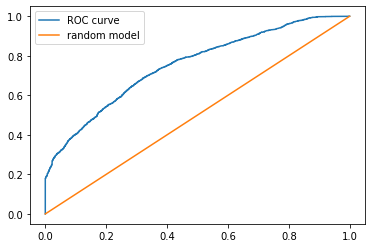

In [146]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1], )

plt.plot(fpr, tpr, label='ROC curve')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), label='random model')
plt.legend()
plt.show()

In [ ]:
# tree.plot_tree(model)

Ukončeno FLYER
2016-12-31      10
2017-01-31     109
2017-02-28     111
2017-03-31     123
2017-04-30      49
2017-05-31      76
2017-06-30     111
2017-07-31      83
2017-08-31     120
2017-09-30     145
2017-10-31     252
2017-11-30     471
2017-12-31     420
2018-01-31     423
2018-02-28     465
2018-03-31     509
2018-04-30     539
2018-05-31     562
2018-06-30     446
2018-07-31     380
2018-08-31     464
2018-09-30     557
2018-10-31    1898
2018-11-30     973
2018-12-31     399
2019-01-31     312
2019-02-28     365
2019-03-31     427
2019-04-30     402
2019-05-31     345
2019-06-30     274
2019-07-31     288
2019-08-31     288
2019-09-30     143
2019-10-31     170
2019-11-30     160
2019-12-31     356
2020-01-31     258
2020-02-29     229
2020-03-31     401
2020-04-30     485
2020-05-31     579
2020-06-30     637
Freq: M, Name: Stav, dtype: int64


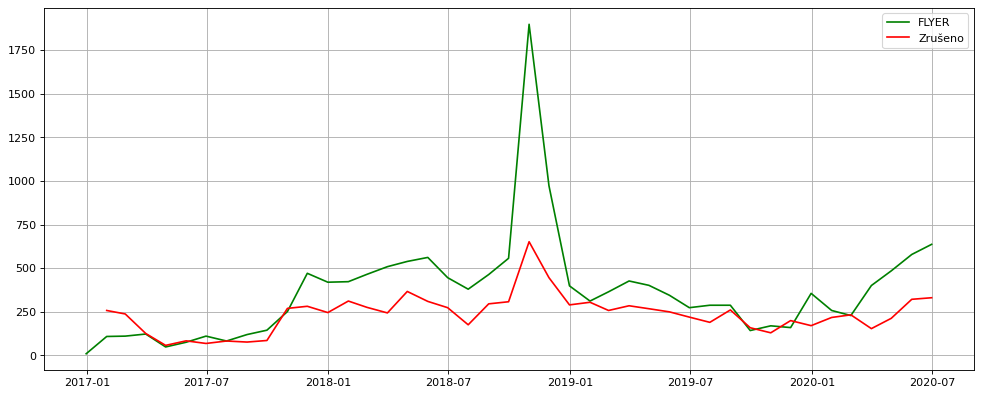

In [93]:
dfA = df_all
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
#FLYER
Overview_of_sales = dfA.loc[(dfA['Stav'] == 'Ukončeno FLYER' )]
#key is difrent column that previus "ukon4eno FLYER"
Overview_of_sales = Overview_of_sales.groupby(pd.Grouper(key='Ukončeno FLYER', freq="m")).count()
#slicing misstakes of merchants
Overview_of_sales = Overview_of_sales['Stav'][35:-1]


#making DF for linear regresion 
df_OS = Overview_of_sales.to_frame()
# df_OS['months_from_start'] = (df_OS.index - df_OS.index[0]).days/30; df_OS 
# df_OS = df_OS.round(0)


Overview_of_cancled = dfA.loc[(dfA['Stav'] == 'Zrušen' )].groupby(pd.Grouper(key='Zrušeno', freq="M")).count()
Overview_of_cancled = Overview_of_cancled['Stav'][:-1]

plt.plot(Overview_of_sales, c='g', label='FLYER',)
plt.plot(Overview_of_cancled, c='r',label='Zrušeno')
plt.grid()
plt.legend()
print(Overview_of_sales)

In [94]:
from fbprophet import Prophet
df_OS = df_OS.reset_index()
df_OS = df_OS.rename(columns={"Stav": "y","Ukončeno FLYER": "ds"})
# df_OS = df_OS.set_index('months_from_start')
# df_OS = df_OS['months_from_start'] = index



In [101]:
df_OS = df_OS[:39]
df_OS = df_OS[::23]
df_OS

,ds,y
0,2016-12-31,10
23,2018-11-30,973


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


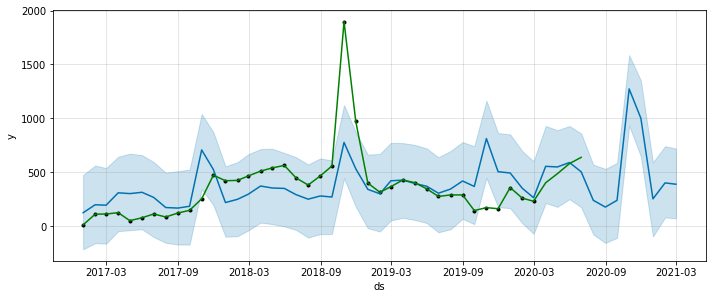

In [99]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df_OS)
future = m.make_future_dataframe( periods=12, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)
fig.set_size_inches(10,4)
plt.plot(Overview_of_sales, c='g', label='FLYER',)


In [2]:
dfA = df_all
Overview_of_cancled = dfA.loc[(dfA['Stav'] == 'Zrušen' )].groupby(pd.Grouper(key='Zrušeno', freq="M")).count()

NameError: name 'df_all' is not defined